***Data Source2: [Yelp](https://www.yelp.com/developers/documentation/v3/get_started) API***

***Data Source3:  [CityBikes](https://citybik.es/) API***

In [1]:
#imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
final_data=pd.read_csv("../data/final_data.csv") # our joined dataset
final_data.head()

,id,name,review_count,rating,latitude,longitude,price,station,category_alias,category_title,no_of_bikes,network_id
0,JNbPJxM07pzJ-6JiXkZu6g,La Galerie Dior,9.0,5.0,48.86653,2.306970,0,Boétie - Ponthieu,museums,Museums,1,velib
1,JNbPJxM07pzJ-6JiXkZu6g,La Galerie Dior,9.0,5.0,48.86653,2.306970,0,Boétie - Ponthieu,arttours,Art Tours,1,velib
2,JNbPJxM07pzJ-6JiXkZu6g,La Galerie Dior,9.0,5.0,48.86653,2.306970,0,Boétie - Ponthieu,fashion,Fashion,1,velib
3,3zZOFdwxA_JDcAKEKomknA,Merci Jérôme,5.0,5.0,48.87776,2.298876,0,Boétie - Ponthieu,bakeries,Bakeries,1,velib
4,3zZOFdwxA_JDcAKEKomknA,Merci Jérôme,5.0,5.0,48.87776,2.298876,0,Boétie - Ponthieu,breakfast_brunch,Breakfast & Brunch,1,velib


***Build a regression model.***

***Assumptions :***
- Choose numerical fields from the dataset like review_count, rating, no_of_bikes
- Categorical fields category_alias or category_title 

***Note:*** Finding the relation between different variables

In [8]:
correlation=final_data.corr() #correlation between the numerical values
correlation

,review_count,rating,latitude,longitude,no_of_bikes
review_count,1.000000,0.014856,0.034672,-0.037693,-0.086082
rating,0.014856,1.000000,0.116967,-0.085008,-0.172185
latitude,0.034672,0.116967,1.000000,-0.214053,0.099972
longitude,-0.037693,-0.085008,-0.214053,1.000000,0.071754
no_of_bikes,-0.086082,-0.172185,0.099972,0.071754,1.000000


In [5]:
#lets plot a heat map for visualization

<AxesSubplot:>

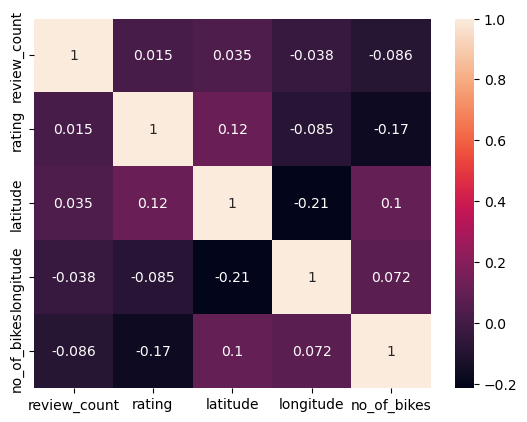

In [10]:
sns.heatmap(correlation,annot=True)

***Note:*** The above correlation coefficient table as well as the heat map depicts poor correlation between the variables as that matrix have all the values closely stacked around the 0

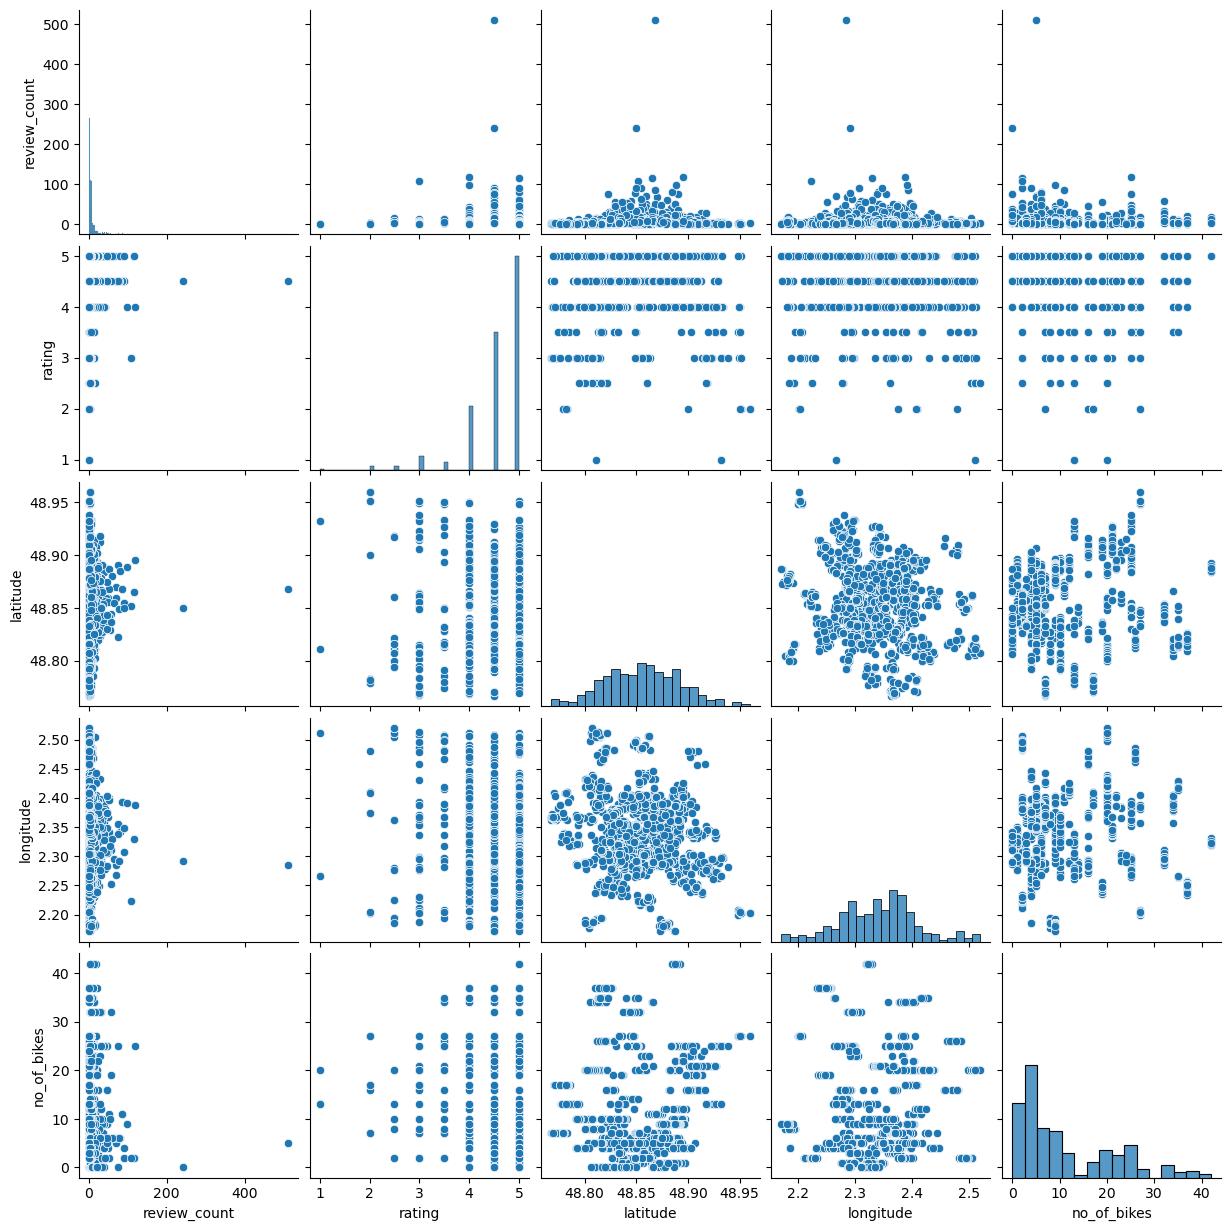

In [11]:
# lets ellaborate the relation more using pair plot
sns.pairplot(final_data)

***Note:*** From the abouve matrix we can detect there are few outliers present in our data.
- Lets understand it better using box plot

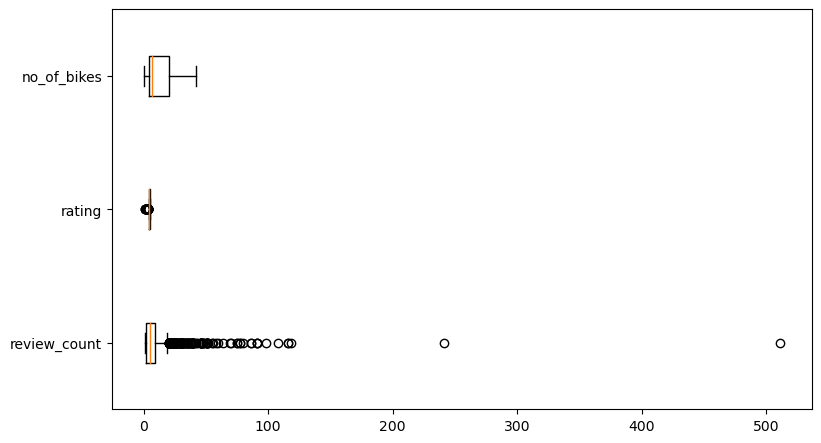

In [18]:
fig = plt.figure(figsize =(7, 4))
 
# Creating axes 
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
'''
    exclude lattitude and longitude as these are the information about the location not the exact numerical value
'''
bp = ax.boxplot(final_data[['review_count','rating','no_of_bikes']] ,vert = 0)
ax.set_yticklabels(['review_count', 'rating','no_of_bikes'])
# show plot
plt.show()

***Note:*** Points lying beyond the minimum and maximum values are outliers. so we cat easy interpret the review count have significat amount of outliers preset

In [19]:
# Lets check the p-values of 'no_of_bikes','rating','review_count'

In [20]:
stat, p1 = scipy.stats.pearsonr(data_slice['no_of_bikes'], data_slice['rating'])
stat, p2 = scipy.stats.pearsonr(data_slice['no_of_bikes'], data_slice['review_count'])
stat, p3 = scipy.stats.pearsonr(data_slice['rating'], data_slice['review_count'])
print(p1, p2, p3)

8.563964427319937e-13 0.00037749385905407626 0.5402322899279931


***Note:*** Using Pearson's cofficient test the only two p-value is <0.05 
- so the p3 will follow H-Null Hypothesis.
- That means 'rating' and 'review_count' are not at all correlated and hence independent to each other
- but 'no_of_bikes' is related to 'rating' as well as 'review_count'
- The conclusion is we can consider no_of_bikes as dependent and other two as predictors



In [21]:
#Lets run a Regression Model to find tha more in-sites

In [23]:
y=final_data['no_of_bikes']
X=final_data[['rating','review_count']]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_bikes   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     32.30
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.71e-14
Time:                        14:01:28   Log-Likelihood:                -6295.8
No. Observations:                1702   AIC:                         1.260e+04
Df Residuals:                    1699   BIC:                         1.261e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.6968      1.838     13.440   

***Note:*** Interpret the results

In [24]:
model.params

const           24.696838
rating          -2.867743
review_count    -0.046166
dtype: float64

- The constant terms is the intercept of the regression line.which tells the noise present in model.
- The coefficient term tells the change in y for a unit change in X
- p-values for both the independent variables are 0 so these are significant.
- but the biggest flaw in this model is very low values of R-squared and Adj.R-squared.That means we need to drop insignificant variables

***Note:*** lets try another regression

In [25]:
y=final_data['no_of_bikes']
X=final_data[['rating']]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_bikes   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     51.94
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           8.56e-13
Time:                        14:02:55   Log-Likelihood:                -6302.0
No. Observations:                1702   AIC:                         1.261e+04
Df Residuals:                    1700   BIC:                         1.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3777      1.841     13.239      0.0

***Note:*** we can clearly see that by ommiting review_count the model become worst with poor R-square

***Note:*** Let's try with sqrt(y)

In [26]:
y=np.sqrt(final_data['no_of_bikes'])
X=final_data[['rating']]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_bikes   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     70.20
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.10e-16
Time:                        14:03:27   Log-Likelihood:                -3059.6
No. Observations:                1702   AIC:                             6123.
Df Residuals:                    1700   BIC:                             6134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2763      0.274     19.254      0.0

***Note:*** Better a bit but not satisfactory

***Provide model output and an interpretation of the results.***

***Result:*** As we have tried various approches but the above model and the corresponding variables could not reveal significant results.

# Stretch

How can you turn the regression model into a classification model?

***Assumptions:***
- for the classification regression we choose the dependent variable as 'category_title'
- map the category

In [27]:
data_slice1=final_data[['category_title','rating','review_count','no_of_bikes']].copy()
data_slice1.head()

,category_title,rating,review_count,no_of_bikes
0,Museums,5.0,9.0,1
1,Art Tours,5.0,9.0,1
2,Fashion,5.0,9.0,1
3,Bakeries,5.0,5.0,1
4,Breakfast & Brunch,5.0,5.0,1


In [28]:
#As out categorical variable is not numerical lets map these categories into numerical codes

In [29]:
unique_cat=data_slice1['category_title'].unique()
unique_cat

array(['Museums', 'Art Tours', 'Fashion', 'Bakeries',
       'Breakfast & Brunch', 'Tea Rooms', 'French', 'Seafood',
       'Dance Clubs', 'Bistros', 'Cocktail Bars', 'Champagne Bars',
       'Persian/Iranian', 'Desserts', 'Patisserie/Cake Shop',
       'Chocolatiers & Shops', 'Italian', 'Japanese', 'Lebanese',
       'Sandwiches', 'Financial Advising', 'Cafes', 'Coffee & Tea',
       'Sushi Bars', 'Coffee Roasteries', 'Korean',
       'Beer, Wine & Spirits', 'Turkish', 'American (Traditional)',
       'Cajun/Creole', 'Beer Bar', 'Vietnamese', 'Thai', 'Wine Bars',
       'Restaurants', 'Wineries', 'Cheese Shops', 'Pizza', 'Vegetarian',
       'Vegan', 'Indian', 'Bars', 'Music Venues', 'Venues & Event Spaces',
       'Landmarks & Historical Buildings', 'Boating', 'African', 'Kebab',
       'Bagels', 'Food Delivery Services', 'Himalayan/Nepalese', 'Hotels',
       'Lounges', 'Brasseries', 'Sri Lankan', 'Food Tours', 'Gardeners',
       'Parks', 'Landscape Architects or Designers', 'Food 

In [30]:
unique_cat1=dict(enumerate(unique_cat.flatten(), 1))
unique_cat1

{1: 'Museums',
 2: 'Art Tours',
 3: 'Fashion',
 4: 'Bakeries',
 5: 'Breakfast & Brunch',
 6: 'Tea Rooms',
 7: 'French',
 8: 'Seafood',
 9: 'Dance Clubs',
 10: 'Bistros',
 11: 'Cocktail Bars',
 12: 'Champagne Bars',
 13: 'Persian/Iranian',
 14: 'Desserts',
 15: 'Patisserie/Cake Shop',
 16: 'Chocolatiers & Shops',
 17: 'Italian',
 18: 'Japanese',
 19: 'Lebanese',
 20: 'Sandwiches',
 21: 'Financial Advising',
 22: 'Cafes',
 23: 'Coffee & Tea',
 24: 'Sushi Bars',
 25: 'Coffee Roasteries',
 26: 'Korean',
 27: 'Beer, Wine & Spirits',
 28: 'Turkish',
 29: 'American (Traditional)',
 30: 'Cajun/Creole',
 31: 'Beer Bar',
 32: 'Vietnamese',
 33: 'Thai',
 34: 'Wine Bars',
 35: 'Restaurants',
 36: 'Wineries',
 37: 'Cheese Shops',
 38: 'Pizza',
 39: 'Vegetarian',
 40: 'Vegan',
 41: 'Indian',
 42: 'Bars',
 43: 'Music Venues',
 44: 'Venues & Event Spaces',
 45: 'Landmarks & Historical Buildings',
 46: 'Boating',
 47: 'African',
 48: 'Kebab',
 49: 'Bagels',
 50: 'Food Delivery Services',
 51: 'Himalaya

In [31]:
swapped_dict = {value: key for key, value in unique_cat1.items()}
swapped_dict

{'Museums': 1,
 'Art Tours': 2,
 'Fashion': 3,
 'Bakeries': 4,
 'Breakfast & Brunch': 5,
 'Tea Rooms': 6,
 'French': 7,
 'Seafood': 8,
 'Dance Clubs': 9,
 'Bistros': 10,
 'Cocktail Bars': 11,
 'Champagne Bars': 12,
 'Persian/Iranian': 13,
 'Desserts': 14,
 'Patisserie/Cake Shop': 15,
 'Chocolatiers & Shops': 16,
 'Italian': 17,
 'Japanese': 18,
 'Lebanese': 19,
 'Sandwiches': 20,
 'Financial Advising': 21,
 'Cafes': 22,
 'Coffee & Tea': 23,
 'Sushi Bars': 24,
 'Coffee Roasteries': 25,
 'Korean': 26,
 'Beer, Wine & Spirits': 27,
 'Turkish': 28,
 'American (Traditional)': 29,
 'Cajun/Creole': 30,
 'Beer Bar': 31,
 'Vietnamese': 32,
 'Thai': 33,
 'Wine Bars': 34,
 'Restaurants': 35,
 'Wineries': 36,
 'Cheese Shops': 37,
 'Pizza': 38,
 'Vegetarian': 39,
 'Vegan': 40,
 'Indian': 41,
 'Bars': 42,
 'Music Venues': 43,
 'Venues & Event Spaces': 44,
 'Landmarks & Historical Buildings': 45,
 'Boating': 46,
 'African': 47,
 'Kebab': 48,
 'Bagels': 49,
 'Food Delivery Services': 50,
 'Himalayan/Ne

In [32]:
data_slice1['category_code'] = data_slice1['category_title'].map(swapped_dict)
data_slice1 = data_slice1.reindex()
data_slice1.head(10)

,category_title,rating,review_count,no_of_bikes,category_code
0,Museums,5.0,9.0,1,1
1,Art Tours,5.0,9.0,1,2
2,Fashion,5.0,9.0,1,3
3,Bakeries,5.0,5.0,1,4
4,Breakfast & Brunch,5.0,5.0,1,5
5,Tea Rooms,5.0,5.0,1,6
6,French,5.0,5.0,1,7
7,Seafood,5.0,5.0,1,8
8,French,5.0,6.0,1,7
9,Dance Clubs,5.0,6.0,1,9


In [33]:
#Now we can use category_code further

***Note:*** Lets start classification Model
- Take category_code as dependent and rating,review_count,no_of_bikes as independent

In [34]:
y = data_slice1['category_code']
X = data_slice1[['rating','review_count']]
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [35]:
#Data was splitted as 80% train data and 20% test data.
 
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
 
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1361, 2)
X_test shape: (341, 2)
y_train shape: (1361, 1)
y_test shape: (341, 1)


In [36]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))

B:\monika\datascience\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
B:\monika\datascience\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
B:\monika\datascience\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
B:\monika\datascience\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
B:\monika\datascience\l

Train Score: 0.1432746175393234
Test Score: 0.14076246334310852



***Note:*** The accuracy score gives the accuracy of the model prediction which comes out to be very low i.e 14% in this case.So this model lacks some more significance.
- One reason could be the sample size which is small that means it lacks the sufficient amount of data to create model and make predictions.